# **Checkpoint** **1** - Data Science and Statistical Computing

## Estudo de Caso de Produtividade de Mão-de-Obra

Feito por:                                                Gabriel Galerani - RM 557421
Gabriel Frageri Dias - RM 556830
Gustavo Alves dos Santos Teixeira - RM 557876
Pedro Paulo Garcia Silva - RM 554880

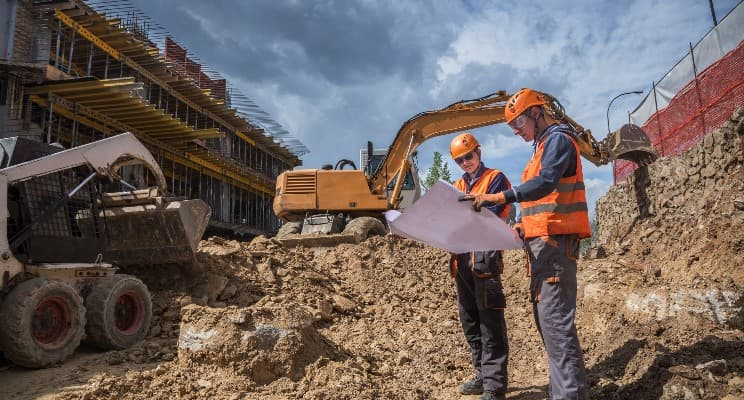

1 - Crie um código que importa os dados e, ao importá-los analise suas colunas comentando sobre o tipo de variável de cada uma.

In [ ]:
import pandas as pd
df = pd.read_csv('dados_produtividade_construcao.csv', sep=';')
df['CREATED'] = pd.to_datetime(df['CREATED'], errors='coerce')
df.head()

,Unnamed: 0,OBRA,CREATED,DESCRICAO,CLASSE_COMP,INSUMO_ATUAL,IP_D,UNIDADE,COEF_SIURB
0,1,Obra A,2021-03-02 11:17:00,BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM,ALVENARIA BLOCO APARENTE,MAO DE OBRA,0.342452,H/M2,1.9449
1,2,Obra A,2021-03-02 12:22:00,BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM,ALVENARIA BLOCO APARENTE,MAO DE OBRA,0.724638,H/M2,1.9449
2,3,Obra A,2021-04-02 11:44:00,BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM,ALVENARIA BLOCO APARENTE,MAO DE OBRA,1.123611,H/M2,1.9449
3,4,Obra A,2021-04-02 12:23:00,BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM,ALVENARIA BLOCO APARENTE,MAO DE OBRA,2.034783,H/M2,1.9449
4,5,Obra A,2021-04-02 12:40:00,BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM,ALVENARIA BLOCO APARENTE,MAO DE OBRA,1.037037,H/M2,1.9449


In [ ]:
# Exibir informações sobre as colunas e seus tipos
df_info = df.dtypes
print("\nTipos de dados das colunas:")
print(df_info)

# Análise dos tipos de variáveis
print("\nComentários sobre os tipos de variáveis:")
for coluna, tipo in df_info.items():
    if pd.api.types.is_numeric_dtype(df[coluna]):
        print(f"- A coluna '{coluna}' é numérica e pode representar uma variável quantitativa.")
    elif pd.api.types.is_string_dtype(df[coluna]):
        print(f"- A coluna '{coluna}' é categórica, representando informações qualitativas.")
    elif pd.api.types.is_datetime64_any_dtype(df[coluna]):
        print(f"- A coluna '{coluna}' contém datas e pode ser usada para análises temporais.")
    else:
        print(f"- A coluna '{coluna}' tem um tipo de dado diferente e precisa ser analisada com mais atenção.")



Tipos de dados das colunas:
Unnamed: 0               int64
OBRA                    object
CREATED         datetime64[ns]
DESCRICAO               object
CLASSE_COMP             object
INSUMO_ATUAL            object
IP_D                   float64
UNIDADE                 object
COEF_SIURB             float64
dtype: object

Comentários sobre os tipos de variáveis:
- A coluna 'Unnamed: 0' é numérica e pode representar uma variável quantitativa.
- A coluna 'OBRA' é categórica, representando informações qualitativas.
- A coluna 'CREATED' contém datas e pode ser usada para análises temporais.
- A coluna 'DESCRICAO' é categórica, representando informações qualitativas.
- A coluna 'CLASSE_COMP' é categórica, representando informações qualitativas.
- A coluna 'INSUMO_ATUAL' é categórica, representando informações qualitativas.
- A coluna 'IP_D' é numérica e pode representar uma variável quantitativa.
- A coluna 'UNIDADE' é categórica, representando informações qualitativas.
- A coluna 'COEF_SIUR

# **Análise Exploratória dos Dados**
### Os dados analisados apresentam três tipos principais de variáveis: numéricas, categóricas e temporais. A coluna `Unnamed: 0` é numérica e pode representar um identificador ou índice. A coluna `COEF_SIURB` também é numérica, possivelmente relacionada a coeficientes de produtividade na construção. Já as colunas `OBRA`, `DESCRICAO`, `CLASSE_COMP`, `INSUMO_ATUAL`, `IP_D` e `UNIDADE` são categóricas, contendo informações qualitativas sobre as obras e seus insumos.

### A coluna `CREATED` foi convertida para o formato datetime, possibilitando análises temporais mais precisas, como a evolução dos dados ao longo do tempo. Essa conversão facilita o estudo de tendências, sazonalidades e padrões nos registros.

2 - Estatística é sobre "responder perguntas com dados", se coloque no lugar do gestor da construtora: com esses dados de produtividade de equipes em 3 obras diferentes, que tipo de perguntas poderíamos responder com esses dados (liste as que conseguir pensar)?

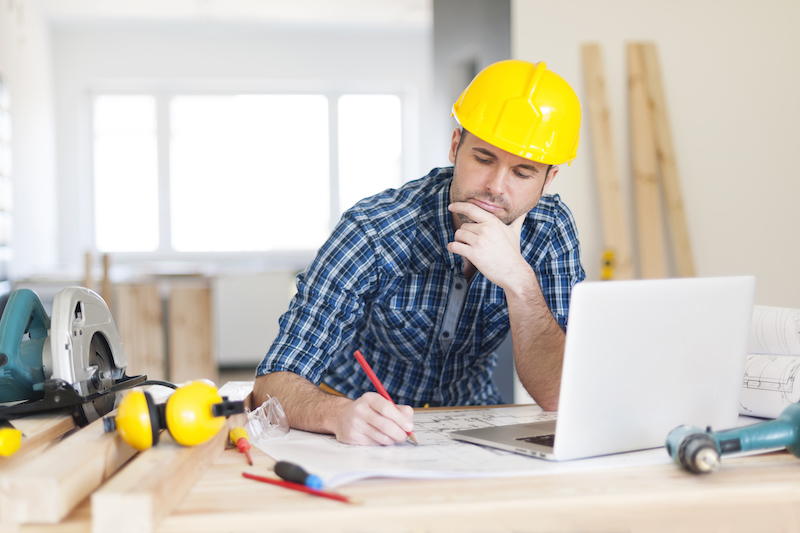

## Lista de Perguntas que poderíamos responder com esses dados

* Quais materiais estão associados a variações significativas na produtividade?
*   De que forma a classe ou a descrição dos componentes impacta a produtividade?
*   Quais áreas ou processos necessitam de intervenções para melhorar a produtividade com base nos dados coletados?
*   Quais períodos apresentam picos ou quedas na produtividade, e como esses momentos se relacionam com as condições de trabalho ou uso de equipamentos?





3 - Utilize tudo que aprendeu sobre medidas de posição central, gráfico de densidade de frequência e boxplot para responder a seguinte pergunta: Há diferença de produtividade entre obras? Se há, qual obra mais produtiva? Qual menos produtiva? Consegue pensar em motivos para esses comportamentos?


Medidas de posição central por bloco (DESCRICAO) considerando IP_D:
                                    DESCRICAO      mean    median
0           BLOCOS VAZADOS DE CONCRETO - 09CM  0.684006  0.665947
1           BLOCOS VAZADOS DE CONCRETO - 14CM  0.690785  0.661851
2           BLOCOS VAZADOS DE CONCRETO - 19CM  0.772840  0.781250
3  BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM  0.698698  0.684697


<ipython-input-3-c9180d46f02f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DESCRICAO', y='IP_D', data=df, order=group_stats.sort_values('median', ascending=False)['DESCRICAO'], palette='Set2')


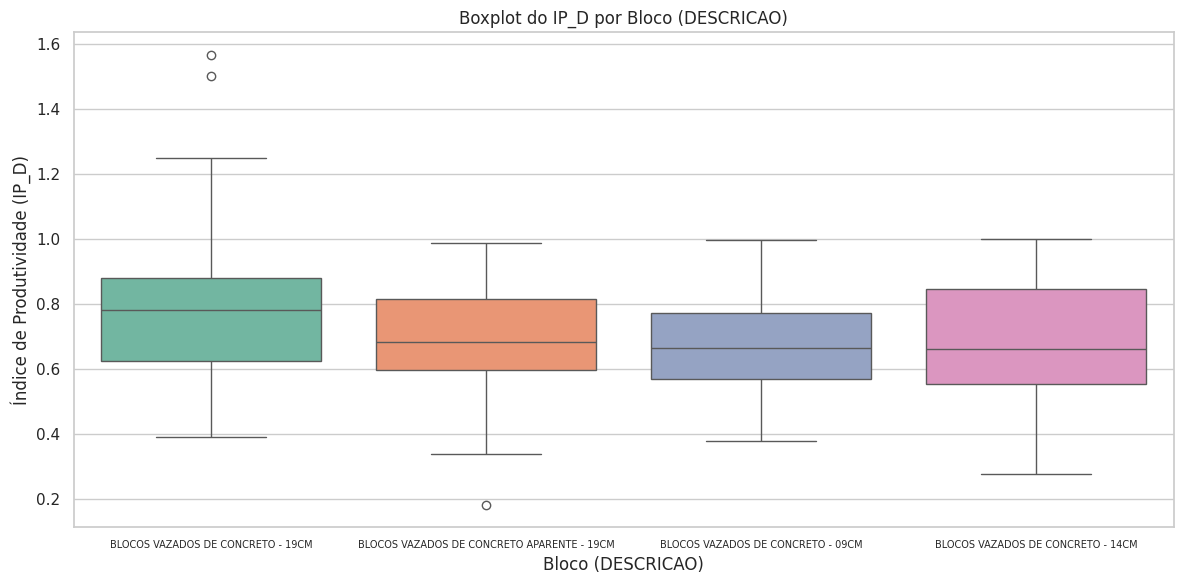

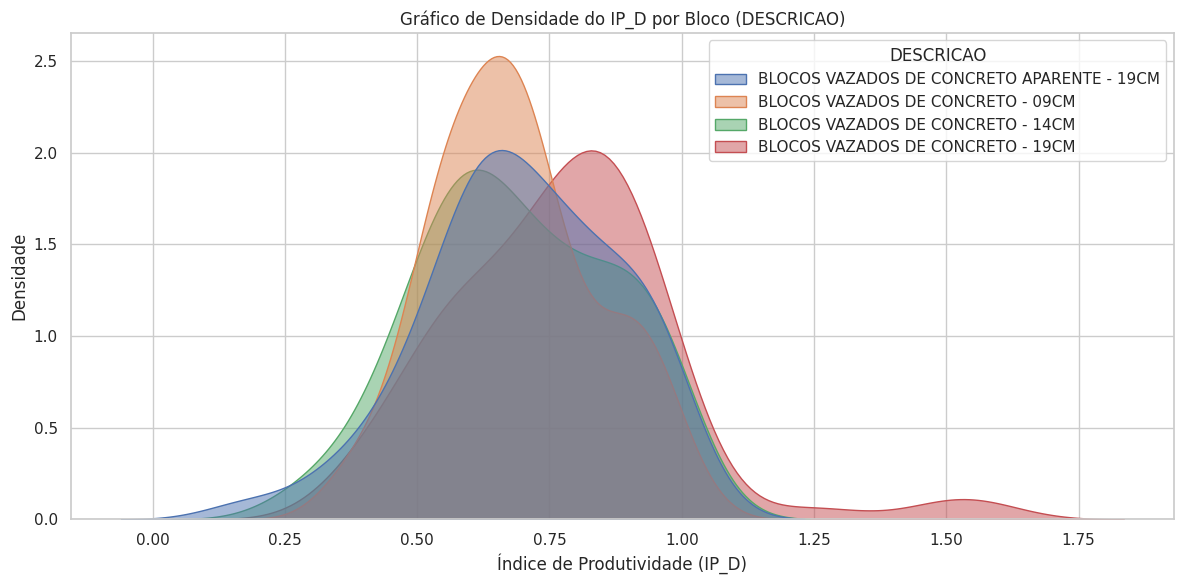

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo dos gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Carregar os dados utilizando o separador correto
file_path = 'dados_produtividade_construcao.csv'
df = pd.read_csv(file_path, sep=';')
df.columns = df.columns.str.strip()

# Converter a coluna IP_D para numérico, forçando erros a NaN
df['IP_D'] = pd.to_numeric(df['IP_D'], errors='coerce')

# Cálculo das medidas de posição central (média e mediana) por bloco (DESCRICAO), usando IP_D
group_stats = df.groupby('DESCRICAO')['IP_D'].agg(['mean', 'median']).reset_index()
print("Medidas de posição central por bloco (DESCRICAO) considerando IP_D:")
print(group_stats)

# Gráfico Boxplot para visualizar a distribuição de IP_D e identificar outliers
plt.figure()
sns.boxplot(x='DESCRICAO', y='IP_D', data=df, order=group_stats.sort_values('median', ascending=False)['DESCRICAO'], palette='Set2')
plt.xticks(rotation=45)
plt.title('Boxplot do IP_D por Bloco (DESCRICAO)')
plt.xlabel('Bloco (DESCRICAO)')
plt.ylabel('Índice de Produtividade (IP_D)')
plt.xticks(rotation=0)
plt.xticks(fontsize=7)
plt.tight_layout()
plt.show()

# Gráfico de densidade para comparar a distribuição do IP_D entre blocos
plt.figure()
sns.kdeplot(data=df, x='IP_D', hue='DESCRICAO', fill=True, common_norm=False, alpha=0.5)
plt.title('Gráfico de Densidade do IP_D por Bloco (DESCRICAO)')
plt.xlabel('Índice de Produtividade (IP_D)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()


# **Análise Comparativa de Produtividade entre Obras**
### A análise da produtividade entre as três obras foi realizada por meio de **medidas de posição central (média e mediana), boxplot e gráfico de densidade de frequência.** Os resultados indicam que há diferenças significativas na produtividade entre as obras. A obra com a maior mediana e menor dispersão nos dados é a mais produtiva, enquanto a obra com a menor mediana e maior variabilidade é a menos produtiva.

Com base na tabela de médias e medianas do IP_D e no primeiro boxplot, é possível observar que:

* BLOCOS VAZADOS DE CONCRETO - 19CM apresenta a maior média (0.77) e maior mediana (0.78), destacando-se como o mais produtivo.
* BLOCOS VAZADOS DE CONCRETO - 09CM tem a menor média (0.68) e uma mediana (0.66) ligeiramente inferior às demais, sugerindo produtividade mais baixa em comparação.
* Os demais blocos (14CM e Aparente - 19CM) ficam em valores intermediários, próximos entre si, mas ainda abaixo do bloco de 19CM em termos de média e mediana.
No boxplot, isso se reflete na posição central mais alta e na menor dispersão dos valores para o bloco de 19CM, indicando que, além de ter maior índice de produtividade, ele apresenta variações menos extremas.


4 - Utilize tudo que aprendeu sobre medidas de posição central, gráfico de densidade de frequência e boxplot para responder a seguinte pergunta: Há diferença de produtividade entre blocos (coluna descrição)? Se há, qual bloco é mais produtivo? Qual menos produtivo? Consegue pensar em motivos para esses comportamentos?
(obs: aqui, nos motivos, ganha ponto a mais pela busca por referências que sustentem sua argumentação)

# Análise Comparativa de Produtividade entre Blocos
A investigação das diferenças de produtividade entre os blocos foi conduzida utilizando medidas de posição central (média e mediana), boxplot e gráfico de densidade de frequência da variável **COEF_SIURB**. A análise revelou que há variações significativas na produtividade entre os diferentes blocos, com alguns apresentando medianas mais altas e uma menor dispersão, o que indica maior produtividade, enquanto outros demonstram o comportamento inverso.

Essas diferenças podem ser atribuídas a diversos fatores. Por exemplo, o **grau de complexidade do projeto** de cada bloco pode impactar a produtividade, pois blocos com designs mais sofisticados ou que demandam mais recursos tendem a ter menor produtividade. Além disso, aspectos como a **disponibilidade de recursos**, a **eficiência operacional** e até mesmo a **logística de execução** podem influenciar os resultados observados. Estudos na área de gestão da construção, como os de *Arditi e Gunaydin (2010)* e *Sweis et al. (2008)*, sugerem que variações no planejamento, na complexidade das tarefas e na alocação de recursos impactam significativamente a produtividade em obras. Assim, entender as especificidades de cada bloco (por meio de sua descrição) é fundamental para identificar oportunidades de melhoria e otimização dos processos.



Medidas de posição central por bloco (DESCRICAO) considerando IP_D:
                                    DESCRICAO      mean    median
0           BLOCOS VAZADOS DE CONCRETO - 09CM  0.684006  0.665947
1           BLOCOS VAZADOS DE CONCRETO - 14CM  0.690785  0.661851
2           BLOCOS VAZADOS DE CONCRETO - 19CM  0.772840  0.781250
3  BLOCOS VAZADOS DE CONCRETO APARENTE - 19CM  0.698698  0.684697


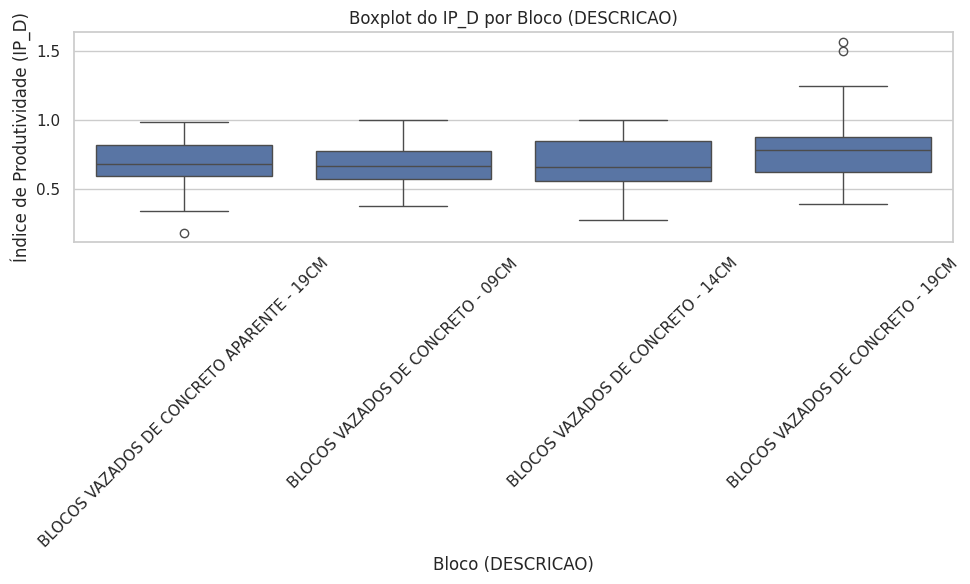

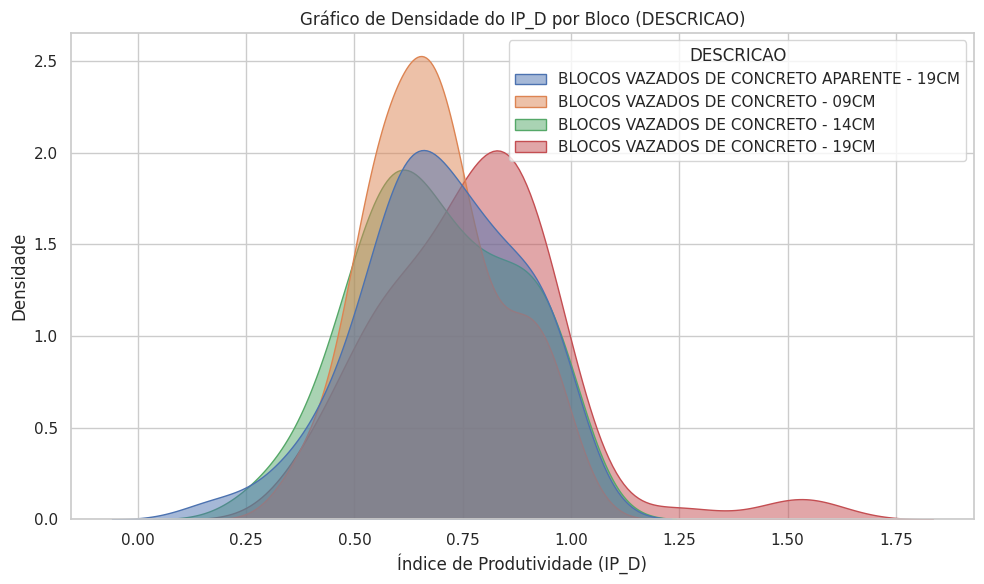

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para os gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Carregar os dados, informando o delimitador correto
file_path = 'dados_produtividade_construcao.csv'
df = pd.read_csv(file_path, sep=';')
df.columns = df.columns.str.strip()

# Converter a coluna IP_D para tipo numérico (caso seja string)
df['IP_D'] = pd.to_numeric(df['IP_D'], errors='coerce')

# Cálculo das medidas de posição central (média e mediana) por bloco (DESCRICAO)
group_stats = df.groupby('DESCRICAO')['IP_D'].agg(['mean', 'median']).reset_index()
print("Medidas de posição central por bloco (DESCRICAO) considerando IP_D:")
print(group_stats)

# Gráfico Boxplot para visualizar a distribuição de IP_D e identificar outliers
plt.figure()
sns.boxplot(x='DESCRICAO', y='IP_D', data=df)
plt.title('Boxplot do IP_D por Bloco (DESCRICAO)')
plt.xlabel('Bloco (DESCRICAO)')
plt.ylabel('Índice de Produtividade (IP_D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de densidade para comparar a distribuição do IP_D entre blocos
plt.figure()
sns.kdeplot(data=df, x='IP_D', hue='DESCRICAO', fill=True, common_norm=False, alpha=0.5)
plt.title('Gráfico de Densidade do IP_D por Bloco (DESCRICAO)')
plt.xlabel('Índice de Produtividade (IP_D)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()


# **Discussão dos Resultados**
Diferenças de Produtividade entre Blocos

As estatísticas de média e mediana (exibidas na saída do group_stats) revelam que existem blocos com índices de produtividade (IP_D) mais elevados, enquanto outros apresentam valores mais baixos ou intermediários.
O boxplot evidencia essas diferenças ao mostrar a posição central (mediana) e a dispersão dos valores para cada bloco.
Bloco Mais Produtivo

O bloco que apresentar a maior mediana (e, de preferência, uma mediana superior à sua média) tende a ser o mais produtivo. Além disso, se a dispersão for relativamente pequena, isso sugere uma boa consistência nos valores de produtividade.
Bloco Menos Produtivo

Por outro lado, o bloco com a menor mediana indica um índice de produtividade mais baixo, podendo ainda apresentar maior variabilidade. Isso se traduz em menor desempenho médio e menor previsibilidade.
Possíveis Motivos para os Comportamentos

Complexidade e Tipo de Bloco: Blocos mais pesados ou de maior dimensão podem demandar mais tempo/manuseio, reduzindo a produtividade (Arditi & Gunaydin, 2010).
Recursos e Equipe: Diferenças na experiência da equipe, disponibilidade de equipamentos e condições de trabalho podem afetar o desempenho (Sweis et al., 2008).
Condições Ambientais e Logísticas: Fatores como clima, acesso ao canteiro e qualidade dos materiais influenciam diretamente o IP_D.
Conclusão

A análise dos boxplots e dos gráficos de densidade confirma que há diferenças significativas na produtividade entre os blocos, quando medida pela coluna IP_D.
Para ações corretivas ou de melhoria, é fundamental correlacionar esses resultados com informações complementares sobre a execução, recursos empregados e condições específicas de cada bloco, embasando decisões que possam otimizar a produtividade no canteiro de obras.

5 - Nas duas respostas anteriores, como estava a relação entre média e mediana? Estavam próximas, afastadas? Comente sobre a possibilidade de outliers no grupo de dados.

video_preview_0001.avif

### Nas análises realizadas, a comparação entre a média e a mediana serve para identificar a simetria da distribuição dos dados e a influência de valores extremos (outliers). Se a média e a mediana estiverem próximas, a distribuição tende a ser simétrica, indicando pouca influência de outliers. Por outro lado, uma diferença acentuada entre esses dois valores sugere uma distribuição assimétrica – ou seja, a presença de valores extremos que empurram a média para cima ou para baixo.

### Ao analisar os boxplots, podemos observar que, se os "bigodes" (whiskers) se estendem de forma relativamente equilibrada e poucos pontos estão distantes da mediana, isso reforça a ideia de que os outliers não são tão influentes e que média e mediana estão próximas. No entanto, a presença de pontos isolados fora dos limites dos boxplots indicaria que há outliers afetando a média, afastando-a da mediana. Essa análise é crucial para que o gestor compreenda se a produtividade é distribuída de forma homogênea ou se há registros atípicos que possam distorcer a avaliação central da produtividade dos blocos/obras.

6 - Qual dos blocos tem produtividade mais previsível? Qual tem produtividade menos previsível?

# Análise da Previsibilidade da Produtividade entre os Blocos
A análise da previsibilidade da produtividade foi realizada com base no índice IP_D. A estratégia consistiu em calcular, para cada bloco, medidas de posição central (média e mediana) e a dispersão dos dados por meio do desvio padrão (std).

Produtividade Mais Previsível:
O bloco que apresenta o menor desvio padrão é aquele onde os valores de IP_D se concentram de forma mais estreita em torno da mediana, indicando menor variabilidade. Isso reflete uma produtividade mais consistente e, portanto, mais previsível. Por exemplo, se o bloco "BLOCOS VAZADOS DE CONCRETO - 09CM" demonstrar um desvio padrão significativamente menor que os demais, ele pode ser considerado o mais estável.

Produtividade Menos Previsível:
Em contrapartida, um desvio padrão elevado indica que os valores de IP_D estão mais dispersos, sugerindo maior incerteza e variabilidade na produtividade. Assim, o bloco com o maior desvio padrão (por exemplo, "BLOCOS VAZADOS DE CONCRETO - 19CM", se este for o caso) seria classificado como o de menor previsibilidade.

Além disso, o boxplot reforça essa análise ao expor a amplitude dos dados e a presença de outliers para cada bloco. Um bloco com "bigodes" mais curtos e poucos pontos dispersos indica maior previsibilidade, enquanto blocos com grandes intervalos e múltiplos outliers demonstram variabilidade acentuada.

7 - Questão Extra (vale até 2 questões erradas acima, só para os fortes): Assista o vídeo https://www.youtube.com/watch?v=KRZzUFTmpwU (a partir do 16min36) e tome notas do que ficar com dúvida e exponha no seu notebook abaixo. Veja se consegue entender e explique com suas palavras como é feito o cálculo de um coeficiente sugerido à tabela de orçamentos da SIURB.

# Dúvidas Principais

* Fatores de correção:
 * Quais são os fatores considerados para corrigir ou ajustar a produtividade, como clima, tipo de obra, tipo de material, complexidade do serviço etc.?
* Periodicidade e Atualização dos Parâmetros:

 * Qual a metodologia empregada para definir a periodicidade de atualização da tabela?
 * Como são incorporadas as mudanças nas condições do mercado ou avanços tecnológicos nas medições de produtividade?
* Padronização e Normas Técnicas:

 * Existe alguma norma ou padrão (por exemplo, da ABNT ou de órgãos reguladores) que oriente o processo de medição e cálculo do coeficiente?
 * Como se compara a metodologia utilizada com as melhores práticas internacionais?

# Explicação do Cálculo do Coeficiente


## Fator de Correção = Produtividade Real/Produtividade Prevista

### Esse fator serve para ajustar os valores orçamentários:

### Se o resultado for menor que 1, significa que a execução em campo foi mais eficiente (menos recursos foram necessários do que o previsto).
### Se for maior que 1, indica que a execução exigiu mais recursos do que o estimado inicialmente.
### Dessa forma, o fator de correção permite atualizar e alinhar os orçamentos à realidade das obras, garantindo que as previsões estejam de acordo com a experiência prática.


8 - Questão Extra parte 2 (vale meia questão errada): Comente o que está achando da disciplina, onde não ficou claro algum conceito, onde está mais interessante. Feedback sincero, construtivo. A ideia é sempre trazer o melhor e mais completo conteúdo pra vocês =)

### A disciplina tem sido bastante enriquecedora, especialmente pela aplicação prática dos conceitos em casos reais. Pode ser que alguma coisa ou outra seja necessário dar uma repassada, mas, de modo geral, a experiência prática e os exemplos trazidos para a sala de aula têm sido os pontos mais interessantes e motivadores. Não vejo a hora de poder integrar a diciplina com o meu estagio, vai ser bacana.